# Вспомогательные данные

In [1]:
import re
import time
import requests
import numpy as np
import pandas as pd

from tqdm import tqdm_notebook

from matplotlib import pyplot as plt
%matplotlib inline

In [71]:
from multiprocessing import Pool
import time

def multithread_it(func, data, threads=None, max_threads=25, min_threads=1):
    # указываем обрабатывающую функцию и список данных, на которых нужно что-то посчитать
    # получаем список результатов
    if not threads:
        threads = max(min_threads,min(len(data), max_threads))
    with Pool(threads) as p:
        result = p.map(func, data)
    return result

In [3]:
def get_data_from_url(url):
    html = requests.get(url).text
    listings = html.split('div class="serp-item__solid">\n\t\t\n')
    listings = [listing for i, listing in enumerate(listings) if i%2==1]

    rent = []
    for listing in listings:
        price = int(listing.split('руб')[0].replace(' ',''))
        area = int(listing.split('<div class="serp-item__solid">')[1].split('&nbsp;')[0])
        rent.append([price, area])
    return rent

# Берём список регионов

In [4]:
html = requests.get('https://www.cian.ru').text

ниже кусок - это кусок из html, в котором в явном виде в json указаны все регионы

In [5]:
l = [{"subdomainName":"www","id":1,"title":"Москва"},{"subdomainName":"www","id":4593,"title":"Московская область"},{"subdomainName":"spb","id":2,"title":"Санкт-Петербург"},{"subdomainName":"spb","id":4588,"title":"Ленинградская область"},{"subdomainName":"www","id":4553,"title":"Адыгея"},{"subdomainName":"www","id":4554,"title":"Алтай (Республика)"},{"subdomainName":"www","id":4555,"title":"Алтайский край"},{"subdomainName":"www","id":4556,"title":"Амурская область"},{"subdomainName":"www","id":4557,"title":"Архангельская область"},{"subdomainName":"www","id":4558,"title":"Астраханская область"},{"subdomainName":"ufa","id":4560,"title":"Башкортостан"},{"subdomainName":"belgorod","id":4561,"title":"Белгородская область"},{"subdomainName":"bryansk","id":4562,"title":"Брянская область"},{"subdomainName":"www","id":4563,"title":"Бурятия"},{"subdomainName":"vladimir","id":4564,"title":"Владимирская область"},{"subdomainName":"volgograd","id":4565,"title":"Волгоградская область"},{"subdomainName":"www","id":4566,"title":"Вологодская область"},{"subdomainName":"voronezh","id":4567,"title":"Воронежская область"},{"subdomainName":"www","id":4568,"title":"Дагестан"},{"subdomainName":"www","id":4569,"title":"Еврейская АО"},{"subdomainName":"www","id":187450,"title":"Забайкальский край"},{"subdomainName":"ivanovo","id":4570,"title":"Ивановская область"},{"subdomainName":"www","id":4571,"title":"Ингушетия"},{"subdomainName":"irkutsk","id":4572,"title":"Иркутская область"},{"subdomainName":"www","id":4573,"title":"Кабардино-Балкария"},{"subdomainName":"kaliningrad","id":4574,"title":"Калининградская область"},{"subdomainName":"www","id":4575,"title":"Калмыкия"},{"subdomainName":"kaluga","id":4576,"title":"Калужская область"},{"subdomainName":"www","id":4577,"title":"Камчатский край"},{"subdomainName":"www","id":4578,"title":"Карачаево-Черкесия"},{"subdomainName":"petrozavodsk","id":4579,"title":"Карелия"},{"subdomainName":"kemerovo","id":4580,"title":"Кемеровская область"},{"subdomainName":"www","id":4581,"title":"Кировская область"},{"subdomainName":"www","id":4582,"title":"Коми"},{"subdomainName":"www","id":4583,"title":"Костромская область"},{"subdomainName":"krasnodar","id":4584,"title":"Краснодарский край"},{"subdomainName":"krasnoyarsk","id":4585,"title":"Красноярский край"},{"subdomainName":"krym","id":181462,"title":"Крым"},{"subdomainName":"www","id":4586,"title":"Курганская область"},{"subdomainName":"www","id":4587,"title":"Курская область"},{"subdomainName":"lipetsk","id":4589,"title":"Липецкая область"},{"subdomainName":"www","id":4590,"title":"Магаданская область"},{"subdomainName":"yoshkar-ola","id":4591,"title":"Марий Эл"},{"subdomainName":"www","id":4592,"title":"Мордовия"},{"subdomainName":"www","id":4594,"title":"Мурманская область"},{"subdomainName":"www","id":4595,"title":"Ненецкий АО"},{"subdomainName":"nn","id":4596,"title":"Нижегородская область"},{"subdomainName":"novgorod","id":4597,"title":"Новгородская область"},{"subdomainName":"novosibirsk","id":4598,"title":"Новосибирская область"},{"subdomainName":"omsk","id":4599,"title":"Омская область"},{"subdomainName":"orenburg","id":4600,"title":"Оренбургская область"},{"subdomainName":"www","id":4601,"title":"Орловская область"},{"subdomainName":"penza","id":4602,"title":"Пензенская область"},{"subdomainName":"perm","id":4603,"title":"Пермский край"},{"subdomainName":"www","id":4604,"title":"Приморский край"},{"subdomainName":"pskov","id":4605,"title":"Псковская область"},{"subdomainName":"rostov","id":4606,"title":"Ростовская область"},{"subdomainName":"ryazan","id":4607,"title":"Рязанская область"},{"subdomainName":"samara","id":4608,"title":"Самарская область"},{"subdomainName":"saratov","id":4609,"title":"Саратовская область"},{"subdomainName":"www","id":4610,"title":"Саха (Якутия)"},{"subdomainName":"www","id":4611,"title":"Сахалинская область"},{"subdomainName":"ekb","id":4612,"title":"Свердловская область"},{"subdomainName":"www","id":184723,"title":"Севастополь"},{"subdomainName":"www","id":4613,"title":"Северная Осетия-Алания"},{"subdomainName":"smolensk","id":4614,"title":"Смоленская область"},{"subdomainName":"stavropol","id":4615,"title":"Ставропольский край"},{"subdomainName":"www","id":4617,"title":"Тамбовская область"},{"subdomainName":"kazan","id":4618,"title":"Татарстан"},{"subdomainName":"tver","id":4619,"title":"Тверская область"},{"subdomainName":"www","id":4620,"title":"Томская область"},{"subdomainName":"tula","id":4621,"title":"Тульская область"},{"subdomainName":"www","id":4622,"title":"Тыва"},{"subdomainName":"tyumen","id":4623,"title":"Тюменская область"},{"subdomainName":"izhevsk","id":4624,"title":"Удмуртия"},{"subdomainName":"ulyanovsk","id":4625,"title":"Ульяновская область"},{"subdomainName":"www","id":4627,"title":"Хабаровский край"},{"subdomainName":"www","id":4628,"title":"Хакасия"},{"subdomainName":"hmao","id":4629,"title":"Ханты-Мансийский АО"},{"subdomainName":"chelyabinsk","id":4630,"title":"Челябинская область"},{"subdomainName":"www","id":4631,"title":"Чечня"},{"subdomainName":"www","id":4633,"title":"Чувашия"},{"subdomainName":"www","id":4634,"title":"Чукотский АО"},{"subdomainName":"yanao","id":4635,"title":"Ямало-Ненецкий АО"},{"subdomainName":"yaroslavl","id":4636,"title":"Ярославская область"}]

вот пример:

In [6]:
l[10]

{'id': 4560, 'subdomainName': 'ufa', 'title': 'Башкортостан'}

In [7]:
regions = pd.DataFrame(l)[['id','title']]

#### Формируем url'ы

In [8]:
url_template = 'https://www.cian.ru/cat.php?deal_type=rent&engine_version=2&offer_type=flat&p={}&region={}&room1=1&type=4'

In [9]:
regions['listings'] = [None]*len(regions)
regions['url_template'] = [url_template.format('{}',id) for id in regions.id]

In [10]:
regions

,id,title,listings,url_template
0,1,Москва,None,https://www.cian.ru/cat.php?deal_type=rent&eng...
1,4593,Московская область,None,https://www.cian.ru/cat.php?deal_type=rent&eng...
2,2,Санкт-Петербург,None,https://www.cian.ru/cat.php?deal_type=rent&eng...
3,4588,Ленинградская область,None,https://www.cian.ru/cat.php?deal_type=rent&eng...
4,4553,Адыгея,None,https://www.cian.ru/cat.php?deal_type=rent&eng...
5,4554,Алтай (Республика),None,https://www.cian.ru/cat.php?deal_type=rent&eng...
6,4555,Алтайский край,None,https://www.cian.ru/cat.php?deal_type=rent&eng...
7,4556,Амурская область,None,https://www.cian.ru/cat.php?deal_type=rent&eng...
8,4557,Архангельская область,None,https://www.cian.ru/cat.php?deal_type=rent&eng...
9,4558,Астраханская область,None,https://www.cian.ru/cat.php?deal_type=rent&eng...


# Начинаем качать

Установим нужное нам кол-во страниц на область (на странице 50 объявлений)

In [11]:
LISTINGS_PER_PAGE = 50
NUMBER_OF_LISTINGS_PER_REGION = 2000
NUMBER_OF_PAGES_PER_REGION = int(NUMBER_OF_LISTINGS_PER_REGION/LISTINGS_PER_PAGE)

In [12]:
rent = []

In [13]:
for row in tqdm_notebook(regions.iterrows()):
    try:
        r = row[1]
        urls = [r.url_template.format(i) for i in range(NUMBER_OF_PAGES_PER_REGION)]
        listings = multithread_it(get_data_from_url, urls, threads=25)
        listings = sum(listings,[])
        rent.append(listings)
        time.sleep(0.5)
    except:
        rent.append(None)

Разброс цен и метража в Москве (нужно было, конечно, удалить аномалии)

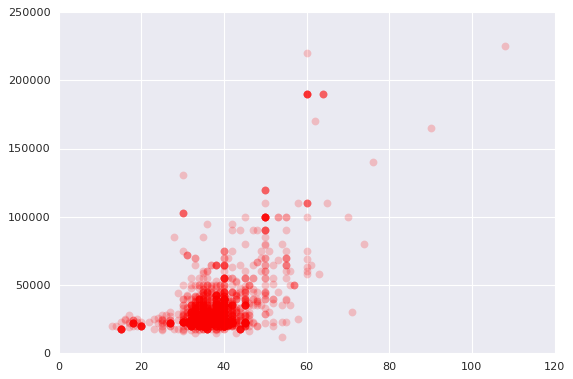

In [176]:
price = [i[0] for i in regions.listings[0]]
area = [i[1] for i in regions.listings[0]]
plt.plot(area, price, 'ro', alpha=0.2)

Цена аренды 1 метра в Москве

''

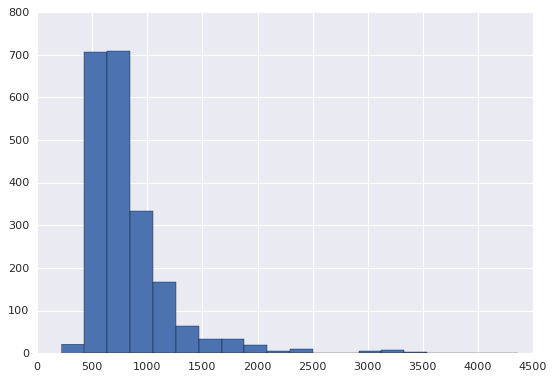

In [170]:
plt.hist([i[0]/i[1] for i in regions.listings[0]], bins=20)
''

# Делаем общую базу

In [15]:
regions['listings'] = rent

In [58]:
regions.to_pickle('cian_regions_data.pkl')

# Считаем статистику

In [18]:
def get_median_price_1m2(list_of_listings):
    return np.median([i[0]/i[1] for i in list_of_listings])

In [21]:
regions['median_price_1m2'] = [get_median_price_1m2(listings) for listings in regions.listings]

/Applications/Utilities/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)


In [34]:
median_area = np.median([i[1] for i in sum(list(regions.listings), [])])

In [44]:
regions['price_per_typical_area'] = [median_area*i for i in regions.median_price_1m2]

In [59]:
regions.to_pickle('cian_regions_data.pkl')

# Отдельно сохраним результат

In [64]:
regions[['title','price_per_typical_area']].to_excel('median_cost.xlsx')

А этим потом можно заполнить пропуски, хотя лучше как-то по соседям хотя бы брать


In [70]:
regions.price_per_typical_area.median()

11341.353383458645

# Теперь можно отдельно исследовать цены

In [89]:
def get_df(listings, bins=40):
    df = pd.DataFrame(listings, columns=['price','area'])
    df['price_if_area_is_28'] = df.price/df.area*28
    df.price_if_area_is_28.hist(bins=bins)

In [93]:
regions.title[:10]

0                   Москва
1       Московская область
2          Санкт-Петербург
3    Ленинградская область
4                   Адыгея
5       Алтай (Республика)
6           Алтайский край
7         Амурская область
8    Архангельская область
9     Астраханская область
Name: title, dtype: object

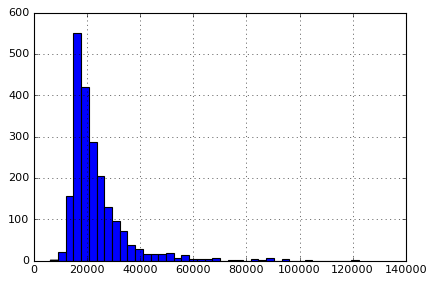

In [95]:
get_df(regions.listings[0])

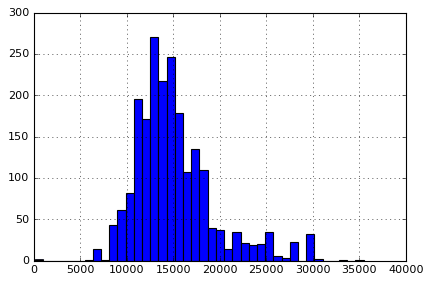

In [96]:
get_df(regions.listings[1])

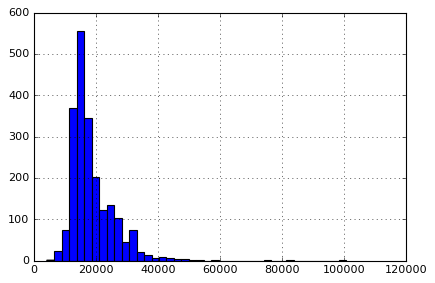

In [97]:
get_df(regions.listings[2])

In [130]:
shaverma = pd.read_excel('shaverma-2.xlsx')

In [124]:
import seabornrn

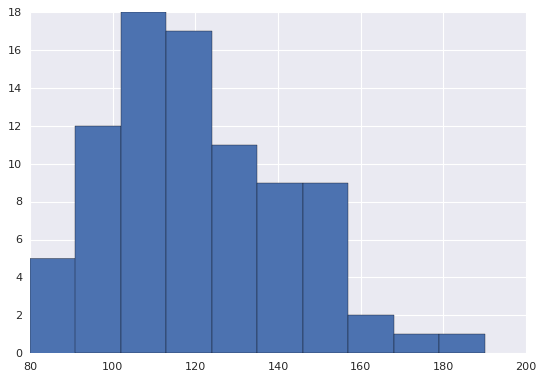

In [131]:
shaverma.shaverma.hist()

# В среднем по стране

In [132]:
a_sh = shaverma.shaverma.median()
a_rent = shaverma.rent.median()
a_sal = shaverma.salary.median()
a_l = shaverma.minimum4living.median()
(a_sal-a_rent-a_l)/a_sh/30

2.1717283950617285

In [134]:
shaverma.columns

Index(['region', 'region_transcription', 'salary', 'rent', 'minimum4living',
       'shaverma', 'shaverma_index_daily', 'Unnamed: 7'],
      dtype='object')

In [140]:
cols = shaverma.columns[2:]

In [143]:
for col in cols:
    try:
        print(col,shaverma[col].median())
    except:
        pass

salary 26070.0
rent 8820.777777777777
minimum4living 9431.0
shaverma 120.0
shaverma_index_daily 2.42


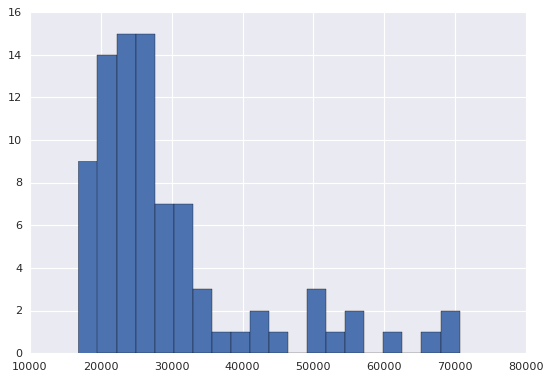

In [154]:
shaverma.salary.hist(bins=20)

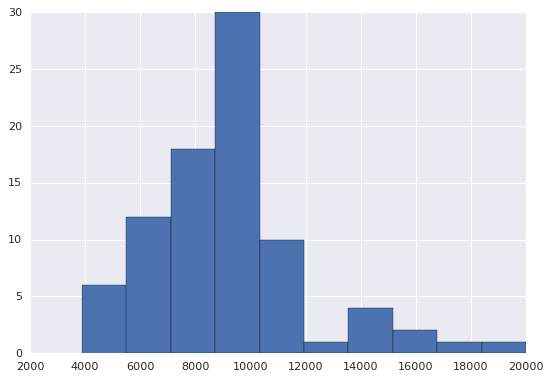

In [146]:
shaverma.rent.hist()

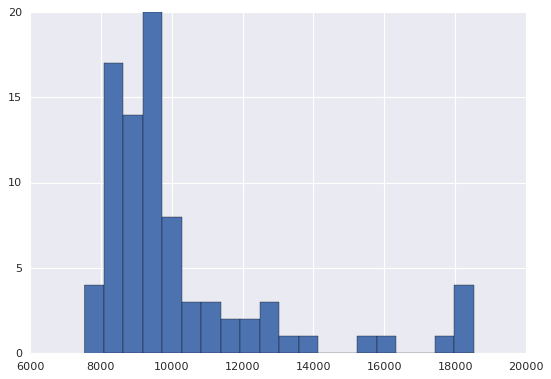

In [153]:
shaverma.minimum4living.hist(bins=20)

In [244]:
plt.rcParams["figure.figsize"] = [8, 5.5]
plt.rcParams["axes.labelsize"] = 14

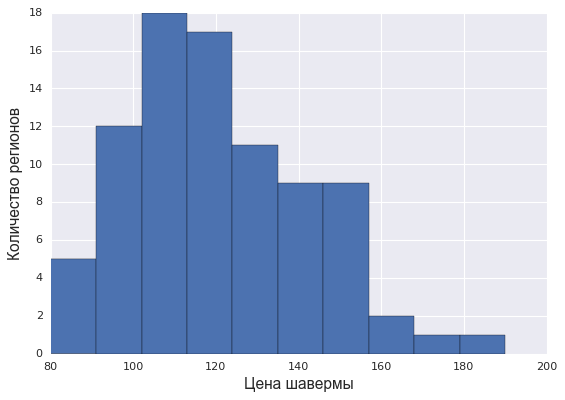

In [245]:
shaverma.shaverma.hist(bins=10)
plt.xlabel('Цена шавермы')
plt.ylabel('Количество регионов')

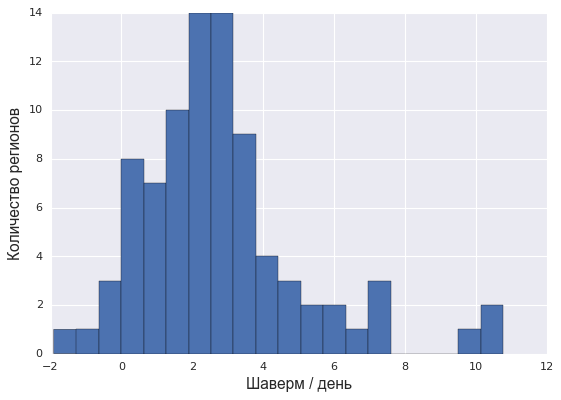

In [246]:
shaverma.shaverma_index_daily.hist(bins=20)
plt.xlabel('Шаверм / день')
plt.ylabel('Количество регионов')

In [203]:
shaverma = pd.read_excel('Shaverma Index.xlsx')

In [206]:
shaverma.columns = [i.strip() for i in shaverma.columns]

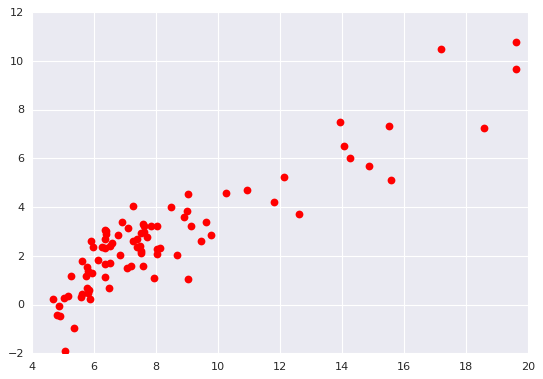

In [212]:
plt.plot(shaverma.classic_bigmac_index, shaverma.shaverma_index_daily, 'ro')